In [9]:
#Importing our Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from collections import Counter

import re

# regular package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import os
import string


# nltk 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Doylism/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# load in the data
df = pd.read_csv('../../clean_data/further_clean1206.csv', index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### What if we turn this into 4 binary classification? 

In [63]:
df['I/E'] = df['MBTI'].str[0]
df['N/S'] = df['MBTI'].str[1]
df['T/F'] = df['MBTI'].str[2]
df['J/P'] = df['MBTI'].str[3]

In [56]:
# df = df.drop(['MBTI1', 'MBTI2'], axis=1)

In [65]:
# convert strings to binary classes
IE = {'I':1, 'E':0}
NS = {'N':1, 'S':0}
TF = {'T':1, 'F':0}
JP = {'J':1, 'P':0}

df['I/E'] = df['I/E'].map(IE)
df['N/S'] = df['N/S'].map(NS)
df['T/F'] = df['T/F'].map(TF)
df['J/P'] = df['J/P'].map(JP)

In [66]:
df

,MBTI,comments_lemma,I/E,N/S,T/F,J/P
0,INFP,lol that be why leave,1,1,0,0
1,INTP,be just about to post try tell people all the ...,1,1,1,0
2,INFP,first thought be pepsi or something probably n...,1,1,0,0
3,ENTP,not if the formula be something like every tim...,0,1,1,0
4,INTP,do this imply be five now,1,1,1,0
...,...,...,...,...,...,...
61912,ISFJ,have the same but with league of legends recen...,1,0,0,1
61913,ISTJ,take easy there no need to come in gun blaze w...,1,0,1,1
61914,ESFP,let remember that both country still have gain...,0,0,0,0
61915,ESTP,be on cfb and bigxii all the time man,0,0,1,0


In [67]:
# save new csv file 
df.to_csv('../../clean_data/split_classes.csv')

In [68]:
# IE
display(df['I/E'].value_counts())

1    1731134
0    1246523
Name: I/E, dtype: int64

In [69]:
# NS
display(df['N/S'].value_counts())


1    1918260
0    1059397
Name: N/S, dtype: int64

In [70]:
# TF
display(df['T/F'].value_counts())


1    1586988
0    1390669
Name: T/F, dtype: int64

In [71]:
# JP
display(df['J/P'].value_counts())


0    1627681
1    1349976
Name: J/P, dtype: int64

### Up and downsample MBTI1  - probably not 

### Some EDAs for both sets

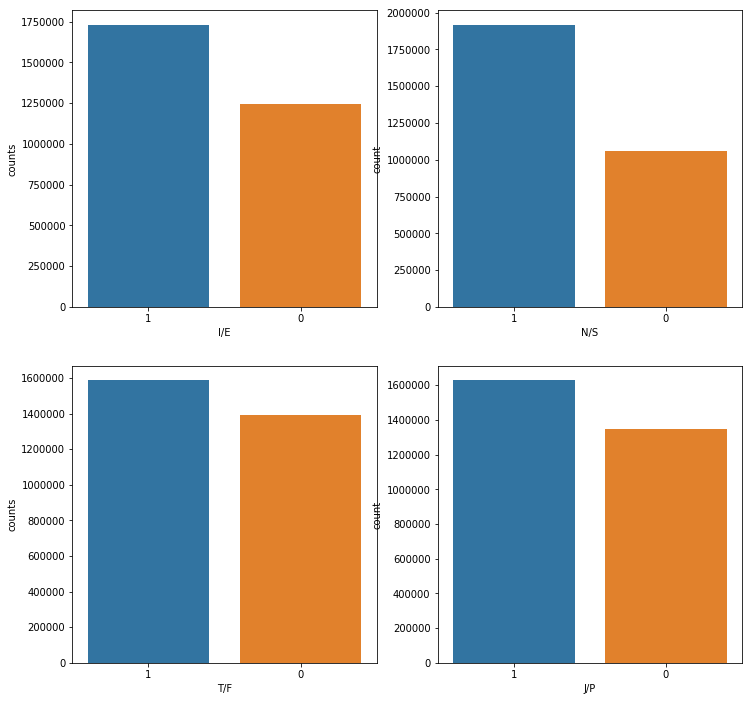

In [83]:
ax = plt.subplots(2,2, figsize=(12,12))

plt.subplot(2,2,1)
g = sns.countplot(data=df, x='I/E', order = df['I/E'].value_counts().index)
plt.ylabel('counts')
g.set_xticklabels({1:'I', 0:'E'})

plt.subplot(2,2,2)
g= sns.countplot(data=df, x='N/S', order = df['N/S'].value_counts().index)
g.set_xticklabels({1:'N', 0:'S'})

plt.subplot(2,2,3)
g = sns.countplot(data=df, x='T/F', order = df['T/F'].value_counts().index)
plt.ylabel('counts')
g.set_xticklabels({1:'T', 0:'F'})

plt.subplot(2,2,4)
g = sns.countplot(data=df, x='J/P', order = df['J/P'].value_counts().index)
g.set_xticklabels({1:'J', 0:'P'})

plt.tight_layout

plt.show()